In [971]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [978]:
df2 = pd.read_csv('./data/test.csv')

In [979]:
df2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [980]:
df1 = pd.read_csv('./data/train.csv')

In [981]:
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [976]:
df1 = df1.drop('Survived',axis=1)
df1.shape,df2.shape

((891, 11), (418, 11))

In [977]:
df = df1.append(df2)
df.shape

(1309, 11)

In [662]:
df.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [663]:
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [664]:
df.Age.isna().sum(),df.Fare.isna().sum(),df.Embarked.isna().sum(),df.Cabin.isna().sum()

# Impute- Age, Fare and Embarked values, Drop Cabin as the Fare should cover this feature. 

(263, 1, 2, 1014)

#  name

In [982]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df['title']=df['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [983]:
print(df['title'].unique())
# df['surname'].nunique()

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer' ' Dona']


In [984]:
df[df['title']==' Don']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don


In [985]:
df[df['title']==' Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Oliva y Ocana,Dona


In [986]:
df['title'].isnull().any(),df['surname'].isnull().any()

(False, False)

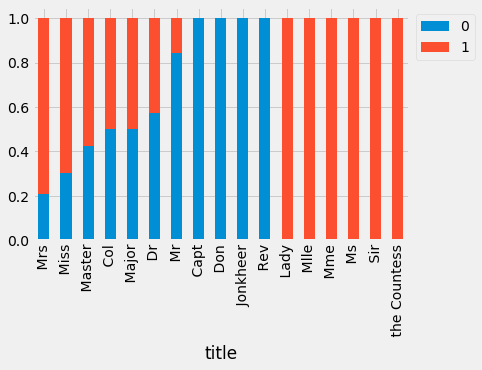

In [675]:
df1['title']=df1['Name'].apply(lambda x: x.split('.')[0].split(',')[1])
df11 = df1.groupby("title")['Survived'].value_counts(normalize=True).unstack()
df11.sort_values(by=df11.columns[0]).plot(kind='bar', stacked='True',legend=False)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# Age

In [987]:
df['Age'].isnull().sum()

263

In [988]:
df.groupby('title')['title'].count()

title
 Capt              1
 Col               4
 Don               1
 Dona              1
 Dr                8
 Jonkheer          1
 Lady              1
 Major             2
 Master           61
 Miss            260
 Mlle              2
 Mme               1
 Mr              757
 Mrs             197
 Ms                2
 Rev               8
 Sir               1
 the Countess      1
Name: title, dtype: int64

In [989]:
df_t1 = df[df['Pclass']==1].groupby('title')['Age'].agg(['mean','median'])
df_t1.head(3)
df_t2= df[df['Pclass']==2].groupby('title')['Age'].agg(['mean','median'])
df_t2.head(3)
df_t3 = df[df['Pclass']==3].groupby('title')['Age'].agg(['mean','median'])
df_t3.head(3)

,mean,median
title,,
Master,6.090000,6.0
Miss,17.360874,18.0
Mr,28.318910,26.0


In [990]:
df_t1['mean_2'] = df_t2['mean']
df_t1['mean_3'] = df_t3['mean']
df_t1.head(3)

,mean,median,mean_2,mean_3
title,,,,
Capt,70.0,70.0,NaN,NaN
Col,54.0,54.5,NaN,NaN
Don,40.0,40.0,NaN,NaN


In [991]:
df_t1.head(19)
df_t1 = df_t1.drop('median',axis=1)
df_t1.columns = ['1','2','3']
df_t1

,1,2,3
title,,,
Capt,70.000000,NaN,NaN
Col,54.000000,NaN,NaN
Don,40.000000,NaN,NaN
Dona,39.000000,NaN,NaN
Dr,45.600000,38.500000,NaN
Jonkheer,38.000000,NaN,NaN
Lady,48.000000,NaN,NaN
Major,48.500000,NaN,NaN
Master,6.984000,2.757273,6.090000


In [992]:
df[(df['Age'].isnull() == True)].groupby('title').title.count()

title
 Dr          1
 Master      8
 Miss       50
 Mr        176
 Mrs        27
 Ms          1
Name: title, dtype: int64

In [993]:
df[(df['Age'].isnull() == True)].groupby('Pclass').title.count()

Pclass
1     39
2     16
3    208
Name: title, dtype: int64

In [994]:
#  Mr,Mrs,Miss in Pclass == 1
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Mr'),41,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Miss'),30,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Mrs'),43,df['Age'])


#  Mr,Mrs,Miss in Pclass == 3
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Mr'),28,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Miss'),17,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Mrs'),32,df['Age'])

#  Mr,Mrs,Miss in Pclass == 2
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Mr'),32,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Miss'),21,df['Age']) 
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 2) & (df['title'] == ' Mrs'),33,df['Age'])


#  Master in Pclass == 3,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Master'),6,df['Age'])
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Master'),7,df['Age'])

# Dr in Pclass == 1,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 1) & (df['title'] == ' Dr'),44,df['Age'])


In [995]:
# Dr in Pclass == 1,
df['Age'] = np.where((df['Age'].isnull() == True) & (df['Pclass'] == 3) & (df['title'] == ' Ms'),17,df['Age'])



In [996]:
df['Age'].isnull().sum()

0

# Name

In [686]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [687]:
df['surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [688]:
df['surname'].nunique()

875

In [689]:
df['title'].isnull().any(),df['surname'].isnull().any()

(False, False)

#  Ticket

In [997]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss


In [691]:
df['Ticket_1'] = df['Ticket'].apply(lambda x: x.split(' ')[-1])
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,17599
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,3101282


In [692]:
df['Ticket_1'] = pd.to_numeric(df['Ticket_1'],errors='coerce')
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,21171.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,17599.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,3101282.0


In [693]:
df['Ticket_1'].isna().sum()

4

In [694]:
print(df[df['Ticket_1'].isnull()])

     PassengerId  Pclass                             Name   Sex   Age  SibSp  \
179          180       3              Leonard, Mr. Lionel  male  36.0      0   
271          272       3     Tornquist, Mr. William Henry  male  25.0      0   
302          303       3  Johnson, Mr. William Cahoone Jr  male  19.0      0   
597          598       3              Johnson, Mr. Alfred  male  49.0      0   

     Parch Ticket  Fare Cabin Embarked    surname title  Ticket_1  
179      0   LINE   0.0   NaN        S    Leonard    Mr       NaN  
271      0   LINE   0.0   NaN        S  Tornquist    Mr       NaN  
302      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  
597      0   LINE   0.0   NaN        S    Johnson    Mr       NaN  


In [695]:
df.loc[[179,271,302,597]]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_1
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,Leonard,Mr,NaN
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,Compton,Mrs,17756.0
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,Tornquist,Mr,NaN
271,1163,3,"Fox, Mr. Patrick",male,28.0,0,0,368573,7.7500,NaN,Q,Fox,Mr,368573.0
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,Johnson,Mr,NaN
302,1194,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S,Phillips,Mr,2.0
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,Johnson,Mr,NaN


In [696]:
df['Ticket_1'].value_counts().argmax(),df['Ticket_1'].value_counts().sort_values(ascending=False)

/opt/anaconda3/envs/ftds6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


(2343.0, 2343.0      11
 1601.0       8
 2144.0       8
 14879.0      7
 17608.0      7
             ..
 349232.0     1
 237671.0     1
 36967.0      1
 349911.0     1
 113043.0     1
 Name: Ticket_1, Length: 923, dtype: int64)

In [697]:
df['Ticket_1'] = df['Ticket_1'].fillna(2)
df['Ticket_1'].isna().sum()

0

In [698]:
df['Embarked'].isnull().sum()

2

In [699]:
df['Cabin'].nunique(),df['Cabin'].count(),df['Cabin'].isna().sum(),df.shape

(186, 295, 1014, (1309, 14))

In [998]:
df['Ticket_2'] = df['Ticket'].str.extract('(\D{2})',expand=True) 
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST


In [999]:
df['Ticket_2'].unique()

array(['A/', 'PC', 'ST', nan, 'PP', 'C.', 'A.', 'SC', 'S.', 'CA', 'SO',
       'W.', '. ', 'C ', 'Fa', 'LI', 'F.', 'W/', 'SW', 'P/', 'WE', 'AQ',
       'LP'], dtype=object)

In [1024]:
df['Ticket_2'].isnull().sum()

957

# Train set only - Ticket prefix importance

In [314]:
df1['Ticket_2'] = df1['Ticket'].str.extract('(\D{2})',expand=True) 
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Ticket_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A/
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,ST


In [333]:
df1['Ticket_2'].unique()

array(['A/', 'PC', 'ST', nan, 'PP', 'C.', 'A.', 'SC', 'S.', 'CA', 'SO',
       'W.', '. ', 'C ', 'Fa', 'LI', 'F.', 'W/', 'SW', 'P/', 'WE'],
      dtype=object)

<Figure size 864x504 with 0 Axes>

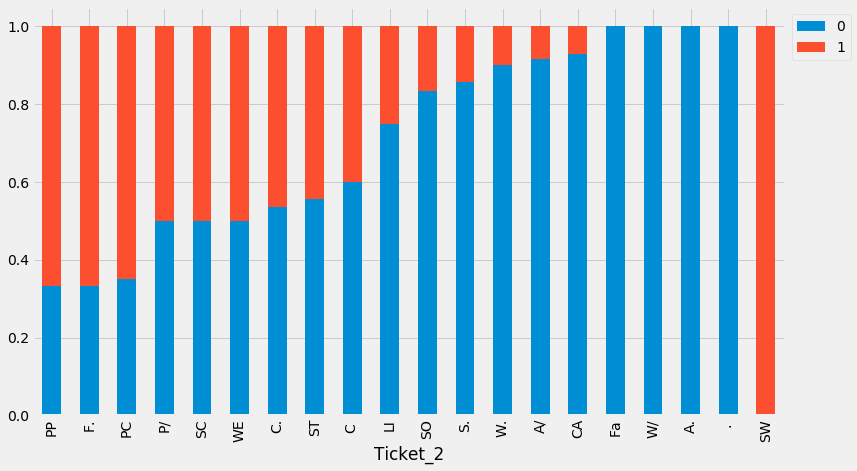

In [335]:
T1 = df1.groupby('Ticket_2')['Survived'].value_counts(normalize=True).unstack()
T1.sort_values(by=T1.columns[0]).plot(kind='bar', stacked='True',legend=False,figsize=(12,7))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# df1.groupby('Ticket_2')['Survived'].value_counts(normalize=True).unstack().plot(kind='bar',stacked='True')

In [332]:
T1.index

Index(['. ', 'A.', 'A/', 'C ', 'C.', 'CA', 'F.', 'Fa', 'LI', 'P/', 'PC', 'PP',
       'S.', 'SC', 'SO', 'ST', 'SW', 'W.', 'W/', 'WE'],
      dtype='object', name='Ticket_2')

In [ ]:
#  drop Tciket,Ticket_1 & Ticket_2

#  Cabin

In [1000]:
df['Cabin'].isnull().sum()

1014

In [1001]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST


In [1006]:
import re
# df['Cabin_1'] = df['Cabin'].apply(lambda x: x.split()[0])
df['Cabin_1'] = df['Cabin'].str.extract('(\w{1})', expand=True)
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2,Cabin_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST,NaN


In [1007]:
df['Cabin_1'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [1008]:
# NaN in Cabin_1 - fill with Z as missing value
df['Cabin_1'] = np.where((df['Cabin_1'].isnull() == True),'Z',df['Cabin_1'])

In [1009]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2,Cabin_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST,Z
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,NaN,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,NaN,Z


In [1005]:
import re
# df['Cabin_1'] = df['Cabin'].apply(lambda x: x.split()[0])
df1['Cabin_1'] = df1['Cabin'].str.extract('(\w{1})', expand=True)
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN


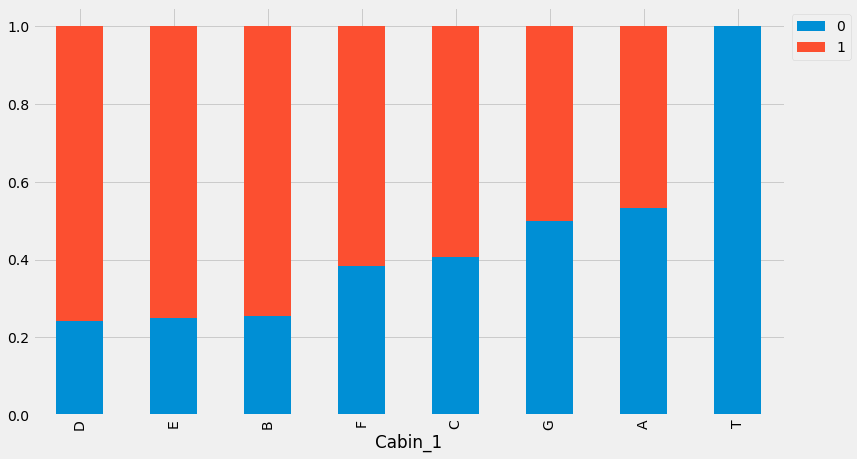

In [708]:
C1 = df1.groupby('Cabin_1')['Survived'].value_counts(normalize=True).unstack()
C1.sort_values(by=T1.columns[0]).plot(kind='bar', stacked='True',legend=False,figsize=(12,7))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [709]:
df1.groupby('Cabin_1')['Survived'].size()

Cabin_1
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Survived, dtype: int64

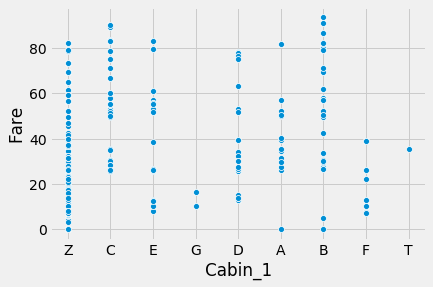

In [710]:
sns.scatterplot(y='Fare',x='Cabin_1',data=df[df['Fare']<100])

In [711]:
#  drop Cabin as Fare should cover this feature

In [712]:
import re
# df['Cabin_1'] = df['Cabin'].apply(lambda x: x.split()[0])
df1['Cabin_1'] = df1['Cabin'].str.extract('(\w{1})', expand=True)
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN


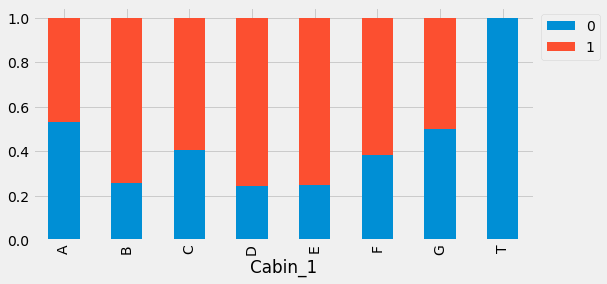

In [713]:
C1 = df1.groupby('Cabin_1')['Survived'].value_counts(normalize=True).unstack()
C1.plot(kind='bar', stacked='True',legend=False,figsize=(8,4))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

#  Embarked

In [1010]:
print(df[df['Embarked'].isnull()])

     PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked surname  title Ticket_2  \
61   38.0      0      0  113572  80.0   B28      NaN   Icard   Miss      NaN   
829  62.0      0      0  113572  80.0   B28      NaN   Stone    Mrs      NaN   

    Cabin_1  
61        B  
829       B  


In [1011]:
# df[df['Survived']==0].groupby('Embarked')['Survived'].count()

In [1012]:
# df[df['Survived']==1].groupby('Embarked')['Survived'].count()

In [1013]:
# Since both passengers missing values for Embarked has survived, assign C as high survival rate. 

In [1014]:
df['Embarked'] = df['Embarked'].fillna('C')

In [1025]:
df['Embarked'].isna().sum()

0

In [1016]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2,Cabin_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST,Z


In [1017]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
surname         object
title           object
Ticket_2        object
Cabin_1         object
dtype: object

In [1018]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'surname', 'title', 'Ticket_2',
       'Cabin_1'],
      dtype='object')

In [1026]:
df['Fare'].isnull().sum()

0

In [1020]:
df['Fare'] = df['Fare'].ffill()
df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
surname        False
title          False
Ticket_2        True
Cabin_1        False
dtype: bool

# drop columns and scale/encode

In [1027]:
#  drop - ['PassengerId', 'Name', Ticket, 'Fare', 'Cabin','surname', 'title','Ticket_2']
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'surname', 'title', 'Ticket_2',
       'Cabin_1'],
      dtype='object')

In [1028]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname,title,Ticket_2,Cabin_1
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,A/,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,PC,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,ST,Z


In [1030]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Ticket_2', 'Cabin','surname'],axis=1)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_1
0,3,male,22.0,1,0,7.2500,S,Mr,Z
1,1,female,38.0,1,0,71.2833,C,Mrs,C
2,3,female,26.0,0,0,7.9250,S,Miss,Z


In [1031]:
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')],axis=1)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
df = pd.concat([df,pd.get_dummies(df['title'], prefix='title')],axis=1)
df = df.drop(['Embarked','title'],axis=1)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_1,Embarked_C,Embarked_Q,Embarked_S,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,3,0,22.0,1,0,7.2500,Z,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,C,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,Z,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [1033]:
# df = pd.concat([df,pd.get_dummies(df['Ticket_2'], prefix='Tick')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Cabin_1'], prefix='Cabin')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Pclass'], prefix='Pclass')],axis=1)
df = df.drop(['Pclass','Cabin_1'],axis=1)
df.head(3)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,title_ Col,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1035]:
# df = df.drop('Ticket_2',axis=1)
df.head(3)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,title_ Capt,title_ Col,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Z,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1036]:
df.isnull().any()

Sex                    False
Age                    False
SibSp                  False
Parch                  False
Fare                   False
Embarked_C             False
Embarked_Q             False
Embarked_S             False
title_ Capt            False
title_ Col             False
title_ Don             False
title_ Dona            False
title_ Dr              False
title_ Jonkheer        False
title_ Lady            False
title_ Major           False
title_ Master          False
title_ Miss            False
title_ Mlle            False
title_ Mme             False
title_ Mr              False
title_ Mrs             False
title_ Ms              False
title_ Rev             False
title_ Sir             False
title_ the Countess    False
Cabin_A                False
Cabin_B                False
Cabin_C                False
Cabin_D                False
Cabin_E                False
Cabin_F                False
Cabin_G                False
Cabin_T                False
Cabin_Z       

# GDBoost 

In [1037]:
df1.shape,df.shape

((891, 13), (1309, 38))

In [1038]:
# Separate out the target

x_train = df[:891]
y_train = df1['Survived']
x_test = df[891:]

x_train.shape,y_train.shape,x_test.shape

((891, 38), (891,), (418, 38))

In [1039]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.3)

In [1040]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=25, learning_rate=0.04,
                                     max_depth=200, random_state=42, max_leaf_nodes=10)
gb_clf2.fit(x_train1, y_train1)
predictions = gb_clf2.predict(x_test1)

In [1041]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test1, predictions))

print("Classification Report")
print(classification_report(y_test1, predictions))

Confusion Matrix:
[[163  17]
 [ 26  62]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       180
           1       0.78      0.70      0.74        88

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.84      0.84      0.84       268



In [762]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf2 = GradientBoostingClassifier(n_estimators=25, learning_rate=0.04,
                                     max_depth=100, random_state=42, max_leaf_nodes=50)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

In [763]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [939]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [1074]:
df2['Survived'] = predictions
df2.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [1075]:
pred = df2.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
pred.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1076]:
pred = pred.set_index('PassengerId')

In [1077]:
pred.head(3)

,Survived
PassengerId,
892,0
893,1
894,0


In [1078]:
write1 = pred.to_csv('./data/lgb2.csv')

In [1079]:
test1 = pd.read_csv('./data/lgb2.csv',index_col=0)

# lgb2 = all except ticket features as the share in test set is not the same. 
# lgb1 = all features (ticket_1,_2,cabin_1,etc)
# pred6 = same as above

In [1080]:
test1.head(3)

,Survived
PassengerId,
892,0
893,1
894,0


In [947]:
test1.shape

(418, 1)

#  Feature importance

In [1042]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [1043]:
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(x_train,y_train)

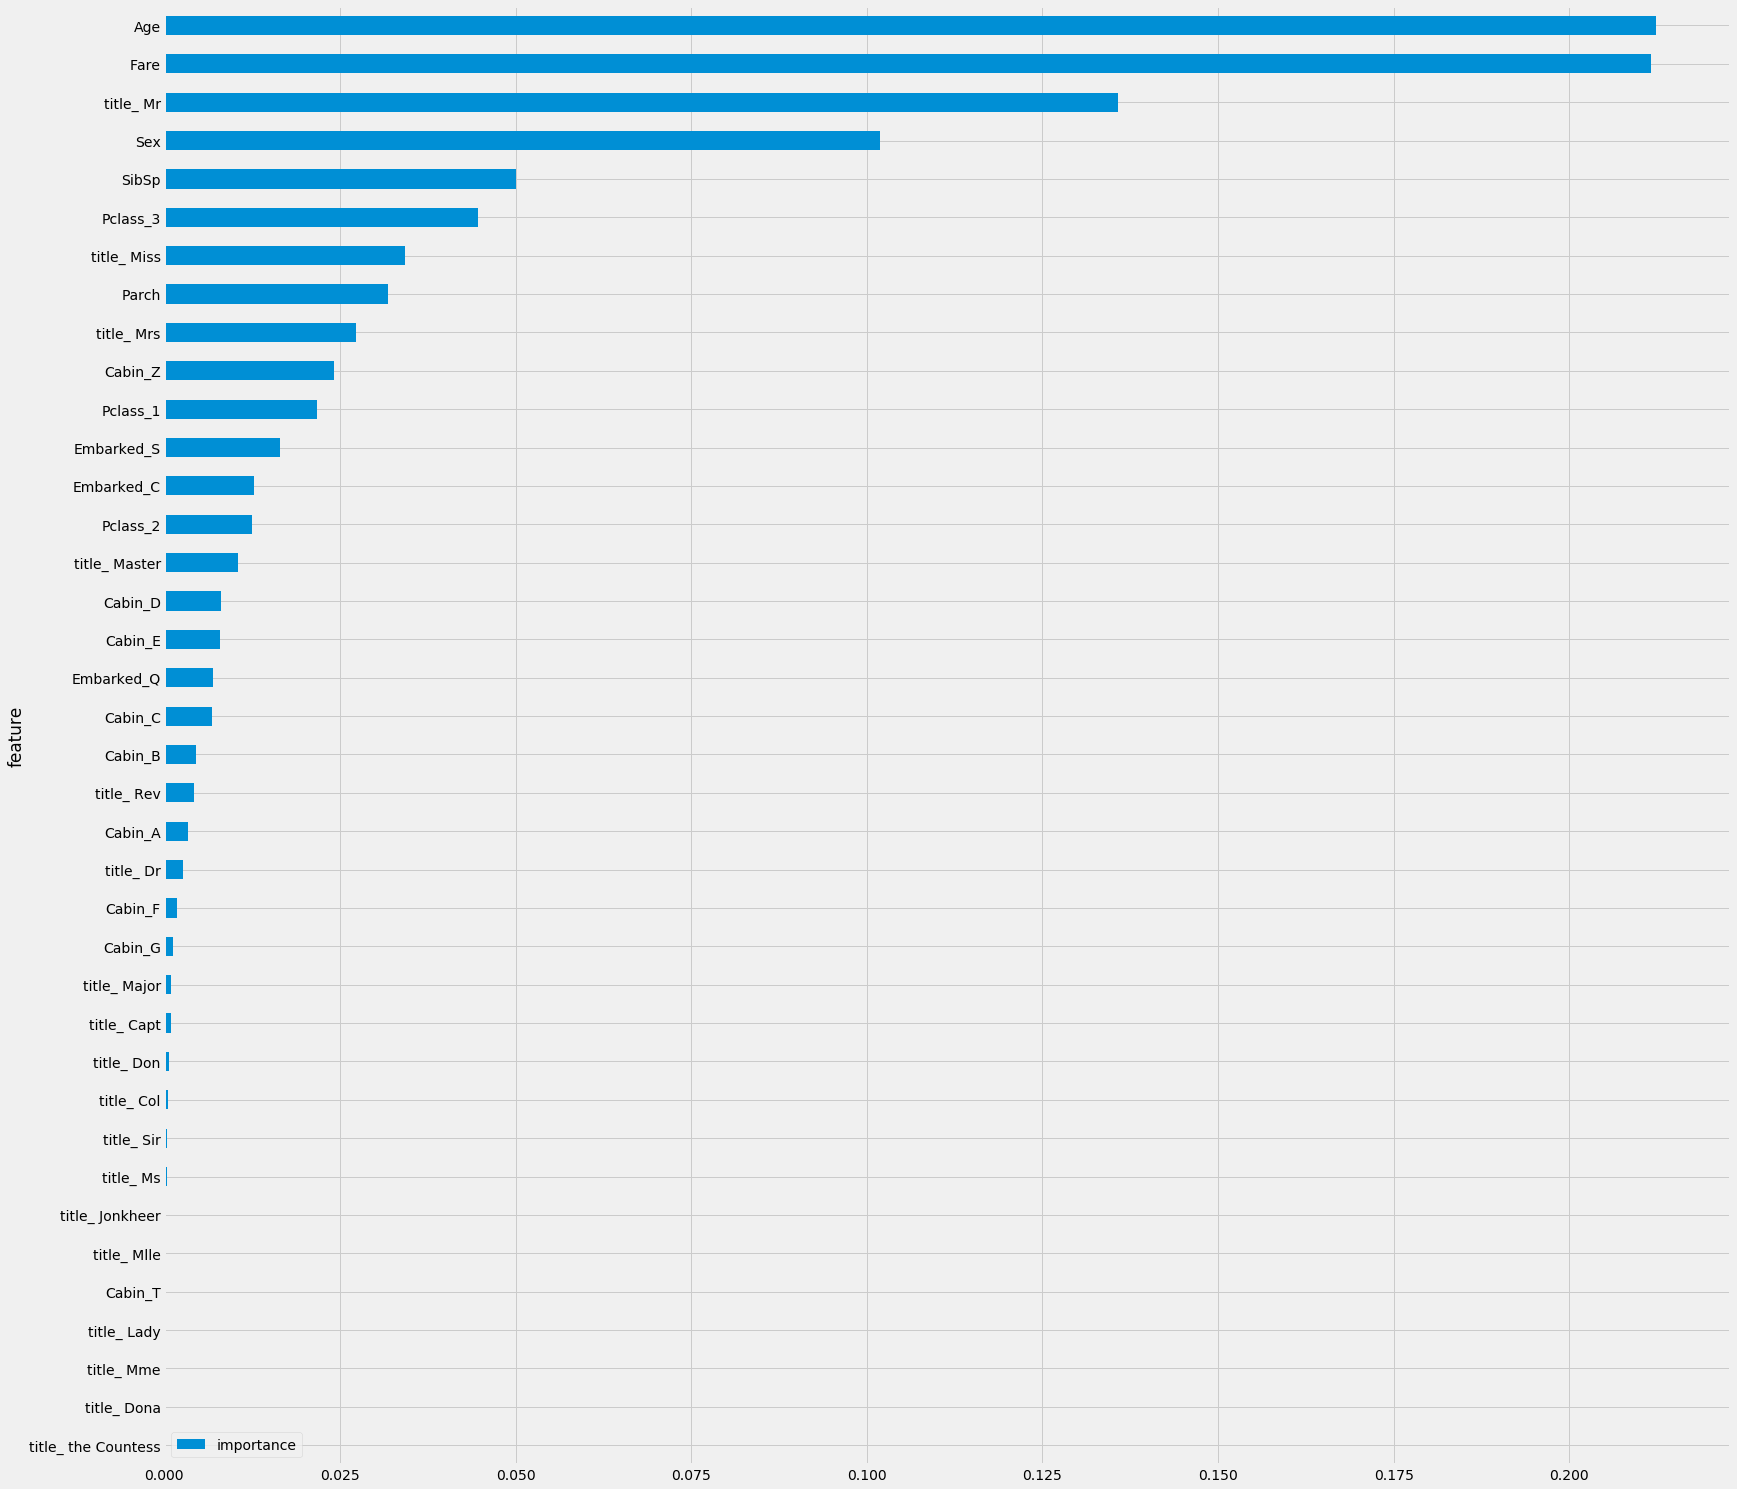

In [1044]:
features = pd.DataFrame()
features['feature'] = x_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

# lgbm 

In [1045]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier

In [1046]:
x_train = df[:891]
y_train = df1['Survived']
x_test = df[891:]

x_train.shape,y_train.shape,x_test.shape

((891, 38), (891,), (418, 38))

In [1068]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
# Split data set into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.25)

In [1069]:
model = LGBMClassifier(
#         boosting = 'dart',
        objective='binary',
        lass_weight = 'balanced',
        metrics ='auc',
        n_jobs=-1,
        n_estimators=50,
        learning_rate=0.22,
        num_leaves=65,
        max_depth =12,
        num_iterations = 250,
        verbose=-1,
        random_state=42)

In [1070]:
model.fit(x_train1, y_train1,
        eval_set=[(x_test1, y_test1)],
        eval_metric=['Accuracy'], 
        early_stopping_rounds=100)

[1]	valid_0's auc: 0.878501
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.879902
[3]	valid_0's auc: 0.88597
[4]	valid_0's auc: 0.890256
[5]	valid_0's auc: 0.891232
[6]	valid_0's auc: 0.890214
[7]	valid_0's auc: 0.895052
[8]	valid_0's auc: 0.898404
[9]	valid_0's auc: 0.89989
[10]	valid_0's auc: 0.901757
[11]	valid_0's auc: 0.901163
[12]	valid_0's auc: 0.89815
[13]	valid_0's auc: 0.897556
[14]	valid_0's auc: 0.900187
[15]	valid_0's auc: 0.896537
[16]	valid_0's auc: 0.898489
[17]	valid_0's auc: 0.89972
[18]	valid_0's auc: 0.895731
[19]	valid_0's auc: 0.896834
[20]	valid_0's auc: 0.894797
[21]	valid_0's auc: 0.894967
[22]	valid_0's auc: 0.895391
[23]	valid_0's auc: 0.895391
[24]	valid_0's auc: 0.894373
[25]	valid_0's auc: 0.89607
[26]	valid_0's auc: 0.899041
[27]	valid_0's auc: 0.897768
[28]	valid_0's auc: 0.89607
[29]	valid_0's auc: 0.895391
[30]	valid_0's auc: 0.894627
[31]	valid_0's auc: 0.897598
[32]	valid_0's auc: 0.896877
[33]	valid_0's auc: 0.895

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', lass_weight='balanced',
               learning_rate=0.22, max_depth=12, metrics='auc',
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_iterations=250, num_leaves=65,
               objective='binary', random_state=42, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbose=-1)

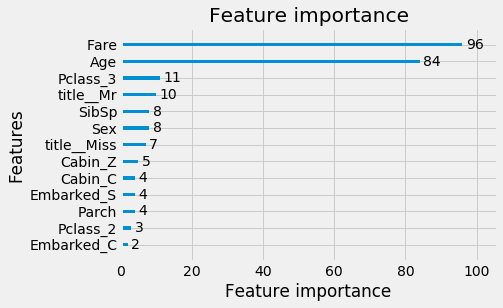

In [1071]:
lgb.plot_importance(model)

In [1072]:
# predict
predictions = model.predict(x_test, num_iteration=model.best_iteration_)

In [1073]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,